<a href="https://colab.research.google.com/github/elainedias16/TCC/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BBC News Dataset

# Reading the Dataset and Creating the Dataframe

In [1]:
import pandas as pd

id_file = '1m41gWGwnLYo0nAEOABnU_MH_SCQHWfjS'
url_file = 'https://drive.google.com/uc?id={}'.format(id_file)

def create_dataframe(path):
    columns=['genre', 'filename', 'title', 'content']
    df =  pd.read_table(
    path,
    header=None,
    names=columns,
    sep= '\t',
    engine= 'python'
    )
    return df


df = create_dataframe(url_file)
df = df.drop(0).reset_index(drop=True)

df.tail()

,genre,filename,title,content
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...
2224,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,..."


In [2]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import spacy
from spacy.lang.en.examples import sentences

!pip install unidecode
import unidecode
from nltk.stem.porter import PorterStemmer
!python -m spacy download en_core_web_sm


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Create dataset with less samples

In [3]:
import random

def create_balanced_small_df(df, genres, num):
  small_df_list = []
  for genre in genres:
    sample_rows = df.sample(num)
    small_df_list.append(sample_rows)
  return pd.concat(small_df_list).reset_index(drop=True)

def create_imbalanced_small_df(df, genres, num_max):
  small_df_list = []
  for genre in genres:
    qtd = random.randint(1, num_max)
    sample_rows = df.sample(qtd)
    small_df_list.append(sample_rows)
  return pd.concat(small_df_list).reset_index(drop=True)


In [4]:
genres = genres = df['genre'].unique()
num_max = 50 # Max number of docs by genre in small df
num = 20 # Number of docs by genre in small df
# small_df = create_balanced_small_df(df, genres, num)
small_df = create_imbalanced_small_df(df, genres, num_max)

# Pre Processing

In [5]:
def remove_non_alphanumeric(text):
    words = ''
    for w in text:
        words += w if w.isalnum() else ' '
    return words

def remove_accents(text):
  return unidecode.unidecode(text)


def lowercasting(tokens):
  tokens = [w.lower() for w in tokens]
  return tokens

def remove_stop_words(tokens):
  stop_words = set(stopwords.words('english')) #List of stop words in english
  tokens = [token for token in tokens if token not in stop_words]
  return tokens


def stemming(tokens):
  porter = PorterStemmer()
  tokens = [porter.stem(token) for token in tokens]
  return tokens


def lemmanization(text):
    nlp = spacy.load("en_core_web_sm")    # Load English language model
    doc = nlp(text)   # Process the text using the Spacy NLP
    tokens = [token.lemma_ for token in doc]
    return tokens


def pre_processing_aux(text):
  words = remove_non_alphanumeric(text)
  words = remove_accents(words)
  tokens = word_tokenize(words)
  tokens = lowercasting(tokens)
  tokens = remove_stop_words(tokens)
  words = ' '.join(tokens)
  tokens = lemmanization(words)
  tokens = stemming(tokens)
  return ' '.join(tokens)


In [6]:
def pre_processing(df):
    df['content'] = df['content'].apply(pre_processing_aux)
    return df

###########################################################
# To prossegue with all dataset, put df on parameter
# To prossegue with small dataset, put small_df in paramter
############################################################

df = pre_processing(small_df)
df.tail()

,genre,filename,title,content
145,politics,346.txt,Labour's four little words,labour unveil four littl word form heart gener...
146,politics,415.txt,Labour MP praises Tory campaign,conserv lot smart way conduct gener elect camp...
147,entertainment,275.txt,The Producers scoops stage awards,produc beat mari poppin battl blockbust west e...
148,sport,252.txt,Ferguson rues failure to cut gap,boss sir alex ferguson leav ru manchest unit f...
149,tech,135.txt,GTA sequel is criminally good,grand theft auto seri game set high standard r...


# Basic statistics analysis

##Documents number by class

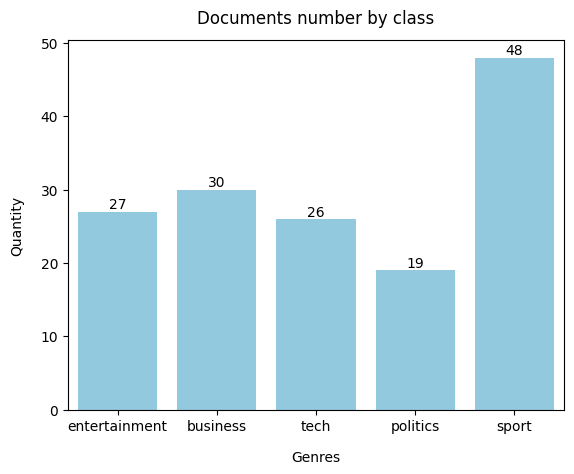

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

genres = df['genre'].unique()

def plot_doc_by_class(genres):
  ax = sns.countplot(x = 'genre', data = df , color='skyblue')
  ax.yaxis.grid(False)
  plt.title('Documents number by class', pad=12)
  plt.xlabel('Genres', labelpad=12)
  plt.ylabel('Quantity', labelpad=12)

  bars = ax.patches
  # Put numbers of docs above bars
  for bar in bars:
        height = int(bar.get_height())
        plt.text(bar.get_x() + bar.get_width()/2, height, height, ha='center', va='bottom')

  plt.show()


plot_doc_by_class(genres)

#Top 30 most frequent words

In [9]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn

def get_genre_content(df, genre):
  content = df.loc[df['genre'] == genre, 'content'].str.cat(sep=' ')
  return content

def create_dict_content(df):
  dict_content = {}
  for genre in genres:
      dict_content[genre] = get_genre_content(df, genre)
      if 'all' in dict_content:
        dict_content['all'] += get_genre_content(df, genre)
      else:
          dict_content['all'] = get_genre_content(df, genre)
  return dict_content

def create_count_content(dict_content):
  count_content = {}
  for genre, content in dict_content.items():
      count_content[genre] = Counter(content.split())
  return count_content


def get_top_n_words(top_n, count_words):
    most_common_words = {}
    for word, count in count_words.most_common(top_n):
        most_common_words[word] = count
    return most_common_words


In [10]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def plot_h_most_common_words(top_n, count_content, genre, title, fontsize):
    most_common = get_top_n_words(top_n, count_content[genre])
    most_common = sorted(most_common.items(), key=lambda x: x[1])
    words = [item[0] for item in most_common ]
    counts = [item[1] for item in most_common ]
    plt.figure(figsize=(11, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Quantity', labelpad=15)
    plt.ylabel('Tokens', labelpad=15)
    plt.grid(False)
    plt.title(title, pad=15)
    #Display number of token in front of each bar
    for i in range(len(words)):
      plt.text(counts[i], i, ' ' + str(counts[i]), ha='left', va='center')

dict_content = create_dict_content(df)
count_content = create_count_content(dict_content)

In [32]:
print(count_content)

{'entertainment': Counter({'film': 79, 'say': 56, 'm': 51, 'award': 44, 'year': 44, 'good': 43, 'music': 35, 'one': 34, 'take': 33, 'star': 30, 'play': 29, 'number': 29, 'show': 27, 'includ': 26, 'well': 25, 'actor': 25, 'role': 24, 'actress': 23, 'last': 23, 'make': 23, 'oscar': 23, 'also': 22, 'album': 22, 'band': 21, 'ceremoni': 20, 'theatr': 19, 'produc': 19, 'we': 19, 'see': 18, 'three': 18, 'director': 17, 'new': 17, 'bbc': 16, 'nomin': 16, 'success': 16, 'top': 16, 'two': 15, 'boy': 15, 'movi': 15, 'peopl': 15, 'christma': 14, 'chart': 13, 'place': 13, 'singl': 13, 'big': 13, 'would': 13, 'perform': 13, 'bene': 13, 'present': 12, 'critic': 12, 'product': 12, 'child': 12, 'go': 12, 'box': 12, 'offic': 12, '2004': 12, 'mr': 12, 'british': 11, 'histori': 11, 'uk': 11, 'debut': 11, 'elvi': 11, 'releas': 11, 'rock': 11, 'time': 11, 'davi': 11, 'london': 10, 'anim': 10, 'part': 10, 'design': 10, 'act': 10, 'week': 10, 'great': 10, 'first': 10, 'tv': 10, 'list': 10, 'mari': 10, 'poppin

##Top 30 most frequent tokens in business

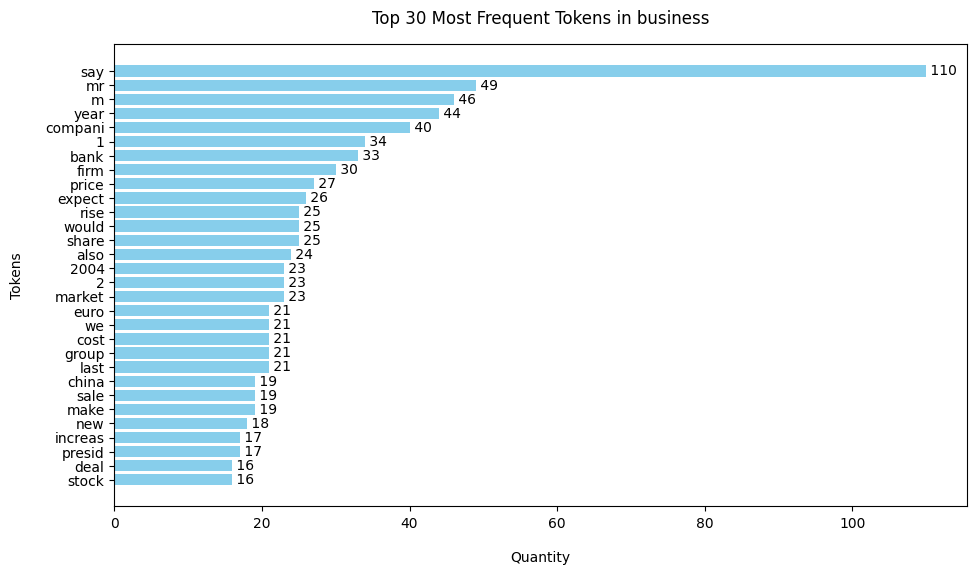

In [28]:
top_n = 30
fontsize = 12
title_business = 'Top {} Most Frequent Tokens in business'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'business', title_business, fontsize)
# common_words_business = get_top_n_words(top_n, count_content['business'])
# print(common_words_business)

##Top 30 most frequent tokens in entertainment




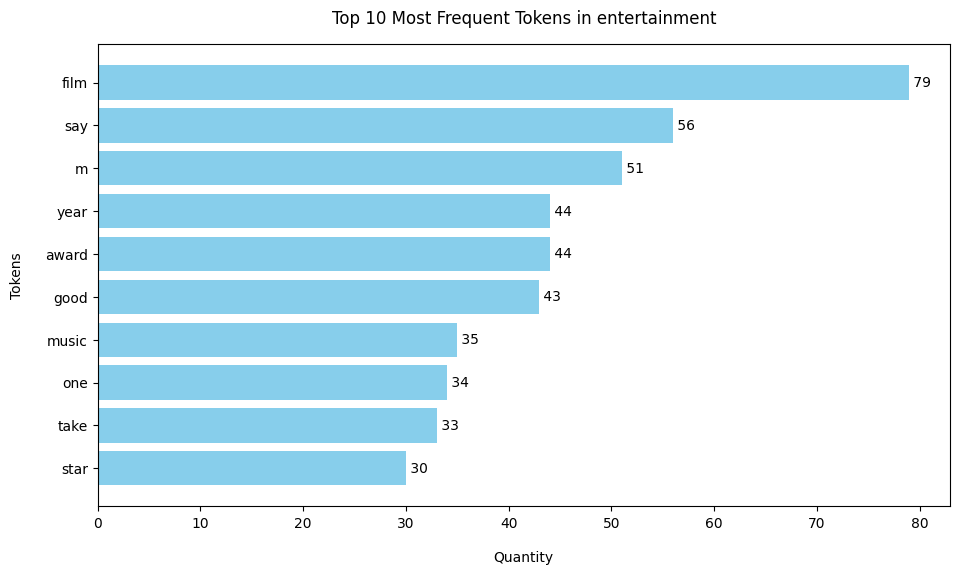

In [29]:
top_n = 10
fontsize = 12
title_entertainment = 'Top {} Most Frequent Tokens in entertainment'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'entertainment', title_entertainment, fontsize)
# common_words_entertainment = get_top_n_words(top_n, count_content['entertainment'])
# print(common_words_entertainment)

##Top 30 most frequent tokens in politics

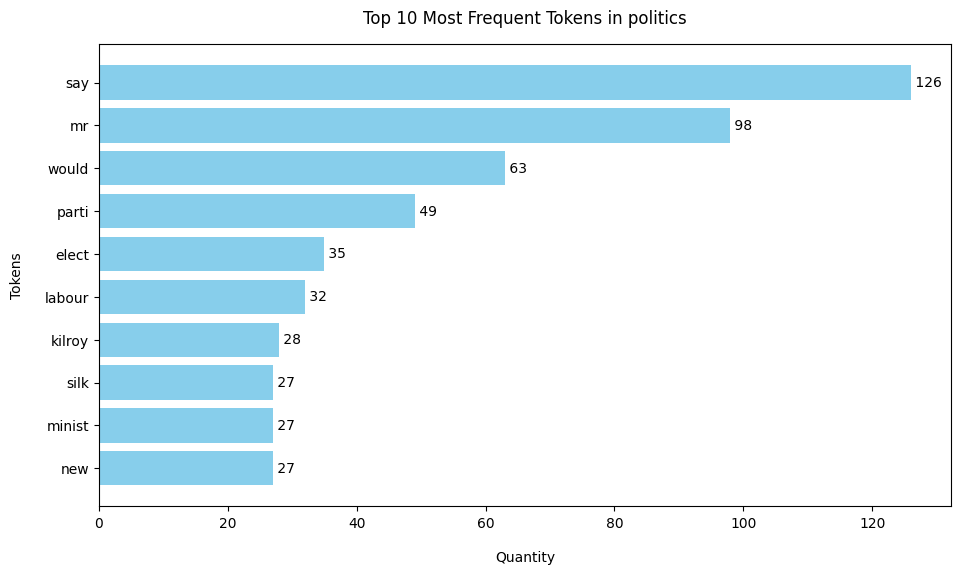

In [12]:
top_n = 10
fontsize = 12
title_politics = 'Top {} Most Frequent Tokens in politics'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'politics', title_politics, fontsize)
# common_words_politics = get_top_n_words(top_n, count_content['politics'])
# print(common_words_politics)

##Top 30 most frequent tokens in sport

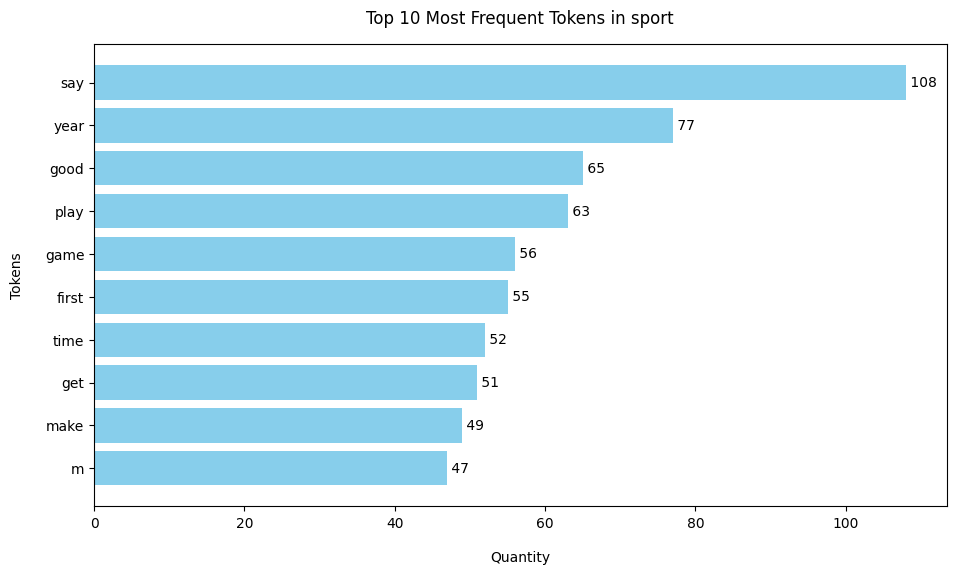

In [13]:
top_n = 10
fontsize = 12
title_sport = 'Top {} Most Frequent Tokens in sport'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'sport', title_sport, fontsize)
# common_words_sport = get_top_n_words(top_n, count_content['sport'])
# print(common_words_sport)

##Top 30 most frequent tokens in tech

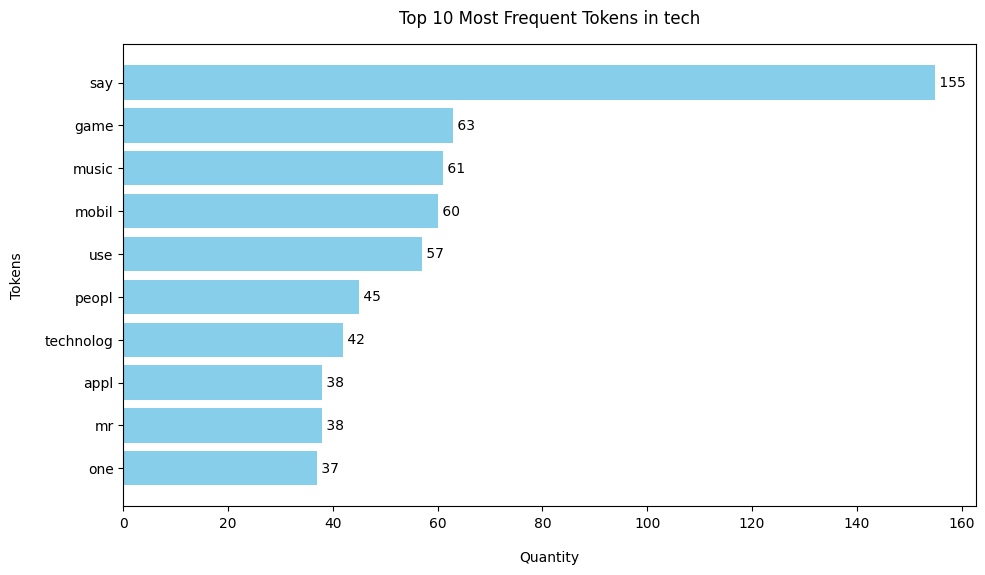

In [14]:
top_n = 10
fontsize = 12
title_tech = 'Top {} Most Frequent Tokens in tech'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'tech', title_tech, fontsize)
# common_words_tech = get_top_n_words(top_n, count_content['tech'])
# print(common_words_politics)

##Top 30 most frequent tokens in all dataset

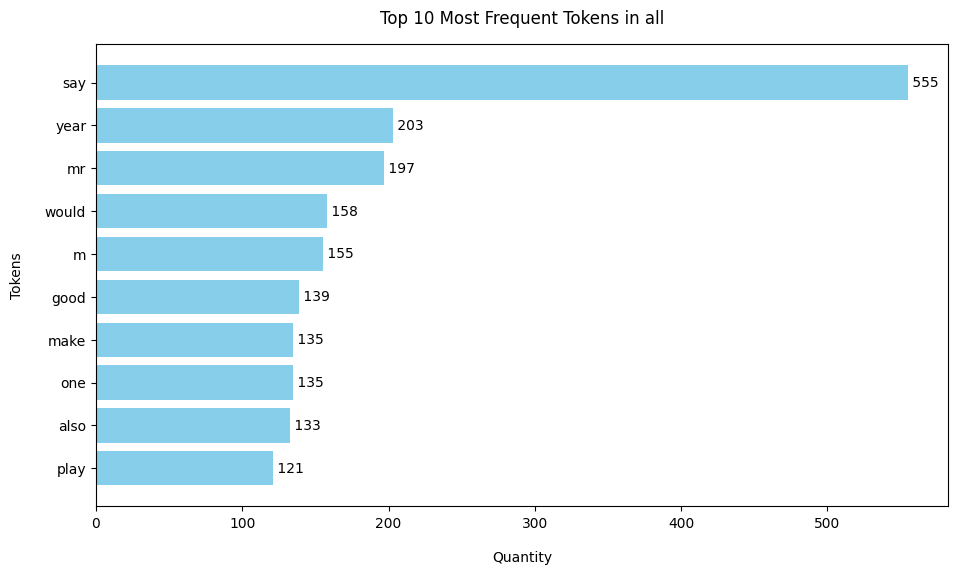

In [15]:
top_n = 10
fontsize = 12
title_all = 'Top {} Most Frequent Tokens in all'.format(top_n)
plot_h_most_common_words(top_n, count_content, 'all', title_all, fontsize)
# common_words_all = get_top_n_words(top_n, count_content['all'])
# print(common_words_all)

#Frequency of class by word

In [16]:
import random

#Choose 10 random tokens in all content of news
random_words = random.sample(dict_content['all'].split(), 3)
print("random words: ", random_words)

def get_counts_by_genre(word, count_genres):
    counts_by_genre = {}  #Dictionary to store word count in each class
    for genre, content_counter in count_genres.items():
        if word in content_counter:
            counts_by_genre[genre] = content_counter[word]  # Adds the word count in the class to the dictionary
    return counts_by_genre


def get_frequency_class_by_word(selected_words, count_genres):
    dict_frequency = {}
    for word in selected_words:
        dict_frequency[word] = get_counts_by_genre(word, count_genres)
    return dict_frequency


dict_frequency = get_frequency_class_by_word(random_words, count_content)
print(dict_frequency)

random words:  ['stephen', 'romant', 'make']
{'stephen': {'entertainment': 3, 'all': 7, 'business': 1, 'politics': 1, 'sport': 2}, 'romant': {'entertainment': 1, 'all': 1}, 'make': {'entertainment': 23, 'all': 135, 'business': 19, 'tech': 30, 'politics': 14, 'sport': 49}}


In [35]:
#Testing
df[df['genre']=='entertainment']

,genre,filename,title,content
0,entertainment,079.txt,Russian film wins BBC world prize,russian drama return vozvrashcheni name winner...
4,entertainment,055.txt,"DVD review: I, Robot",one man recognis robot threat human fine take ...
16,entertainment,008.txt,West End to honour finest shows,west end honour fine star show even standard t...
20,entertainment,129.txt,Brits return Keane to number one,brit success help return kean award win album ...
21,entertainment,132.txt,Hard act to follow for OutKast,us rap duo outkast trio trophi mtv europ award...
23,entertainment,185.txt,Oscar host Rock to keep it clean,oscar host chri rock say steer clear bad langu...
31,entertainment,005.txt,Poppins musical gets flying start,stage adapt child film mari poppin open night ...
32,entertainment,332.txt,Incredibles win animation awards,incred movi beat shrek 2 main prize hollywood ...
34,entertainment,229.txt,New York rockers top talent poll,new york electro rock group braveri come top b...
35,entertainment,363.txt,Oscar nominees lack pulling power,year clutch oscar nomine least popular 20 year...


# Frequency of words by documents

In [19]:
from collections import Counter

def get_frequency(df):
    frequency = {}
    for index, row in df.iterrows():
        filename = row['filename']
        word_counts = dict(Counter(row['content'].split()))
        if filename not in frequency:
          frequency[filename] = word_counts
    return frequency



frequency = get_frequency(df)
print(frequency)


{'079.txt': {'russian': 1, 'drama': 1, 'return': 4, 'vozvrashcheni': 1, 'name': 1, 'winner': 3, 'bbc': 2, 'four': 1, 'world': 3, 'cinema': 2, 'award': 4, 'film': 5, 'tell': 1, 'stori': 1, 'two': 1, 'adolesc': 1, 'boy': 1, 'subject': 1, 'harsh': 1, 'regim': 1, 'strict': 1, 'father': 1, '10': 1, 'year': 3, 'absenc': 1, 'direct': 1, 'andrey': 1, 'zvyagintsev': 1, 'previous': 1, '2003': 1, 'golden': 1, 'lion': 1, 'venic': 1, 'festiv': 1, 'prize': 1, 'present': 2, 'ceremoni': 1, 'hold': 1, 'london': 1, 'thursday': 1, 'host': 1, 'jonathan': 1, 'ross': 2, 'choos': 2, 'panel': 2, 'includ': 2, 'x': 1, 'file': 1, 'actress': 1, 'gillian': 1, 'anderson': 1, 'critic': 1, 'roger': 1, 'clark': 1, 'touch': 1, 'void': 1, 'director': 2, 'kevin': 1, 'mcdonald': 1, 'one': 2, '2005': 1, 'also': 1, 'involv': 1, 'deliber': 1, 'shortlist': 1, 'six': 1, 'around': 1, 'draw': 1, 'nomine': 1, 'motorcycl': 1, 'diari': 1, 'zatoichi': 1, 'hero': 2, 'viewer': 1, 'poll': 1, 'see': 1, 'zhang': 1, 'yimou': 1, 'martial':

In [21]:
content_line = df['content'].iloc[0]
content_line

'russian drama return vozvrashcheni name winner bbc four world cinema award film tell stori two adolesc boy subject harsh regim strict father return 10 year absenc direct andrey zvyagintsev return previous 2003 golden lion award venic film festiv prize present award ceremoni hold london thursday host jonathan ross winner choos panel includ x file actress gillian anderson critic roger clark touch void director kevin mcdonald ross present bbc one film 2005 also involv deliber shortlist six film around world draw panel choos nomine includ motorcycl diari zatoichi hero viewer poll see director zhang yimou martial art epic hero emerg favourit 32 vote cast tragedi strike product return one young star 15 year old vladimir girin drown lake film scene set winner world cinema award last year french anim featur bellevil rendezv'

# Word Index by documents





In [59]:
def create_word_index(df):
    h = {}
    for index, row in df.iterrows():
        filename = row['filename']
        content = row['content']
        words = content.split()
        for word in words:
            if word not in h:
                h[word] = {}

            if filename not in h[word]:
                h[word][filename] = 1
            else:
                h[word][filename] += 1
    return h

word_index = create_word_index(df)
print(word_index)

{'russian': {'079.txt': 1, '391.txt': 5, '422.txt': 3, '363.txt': 1}, 'drama': {'079.txt': 1, '179.txt': 1}, 'return': {'079.txt': 4, '059.txt': 1, '375.txt': 1, '129.txt': 1, '311.txt': 1, '110.txt': 1, '308.txt': 1, '363.txt': 1, '297.txt': 1, '287.txt': 2, '250.txt': 1, '174.txt': 1, '404.txt': 1, '126.txt': 1, '255.txt': 1, '350.txt': 1, '484.txt': 2, '468.txt': 2, '048.txt': 1, '152.txt': 3, '346.txt': 1}, 'vozvrashcheni': {'079.txt': 1}, 'name': {'079.txt': 1, '090.txt': 2, '020.txt': 1, '132.txt': 1, '329.txt': 1, '332.txt': 2, '324.txt': 1, '313.txt': 1, '045.txt': 1, '111.txt': 2, '085.txt': 1, '167.txt': 1, '133.txt': 1, '302.txt': 2, '328.txt': 1, '275.txt': 1, '135.txt': 1}, 'winner': {'079.txt': 3, '186.txt': 1, '179.txt': 2, '313.txt': 1, '287.txt': 1, '167.txt': 1, '452.txt': 1, '275.txt': 1}, 'bbc': {'079.txt': 2, '383.txt': 1, '090.txt': 1, '055.txt': 1, '266.txt': 1, '378.txt': 2, '023.txt': 2, '020.txt': 1, '064.txt': 1, '044.txt': 1, '132.txt': 1, '311.txt': 1, '329

In [58]:
df[df['filename']=='422.txt']

,genre,filename,title,content
59,sport,422.txt,Safin slumps to shock Dubai loss,marat safin suffer shock loss unseed nicola ki...
